In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Charger les données
file_path = 'Raptriement_new.csv'
rapatriement_data = pd.read_csv(file_path, sep=';')

# Conversion de la colonne 'dou' en format date
rapatriement_data['dou'] = pd.to_datetime(rapatriement_data['dou'], format='%d/%m/%Y')

In [3]:
# Statistiques descriptives des colonnes numériques
print(rapatriement_data.describe())

                 ge                            dou           dev  \
count  48048.000000                          48048  48048.000000   
mean    1380.769231  2021-09-24 01:03:41.178821120     72.097965   
min      500.000000            2019-01-02 00:00:00      0.000000   
25%      500.000000            2020-04-21 00:00:00     86.000000   
50%      500.000000            2021-10-15 00:00:00     86.000000   
75%     1600.000000            2023-02-14 00:00:00     86.000000   
max    41100.000000            2024-05-31 00:00:00     86.000000   
std     2375.159581                            NaN     31.353486   

               mdev          tdev          mcfa        motifd           cli  
count  4.804800e+04  48048.000000  4.804800e+04  48048.000000  4.804800e+04  
mean   1.894574e+05    643.889543  1.154270e+08    337.829317  2.520227e+07  
min    1.200000e-01      1.000000  7.871484e+01    100.000000  8.300000e+02  
25%    2.108932e+03    655.957000  1.361411e+06    200.000000  1.530790e+07

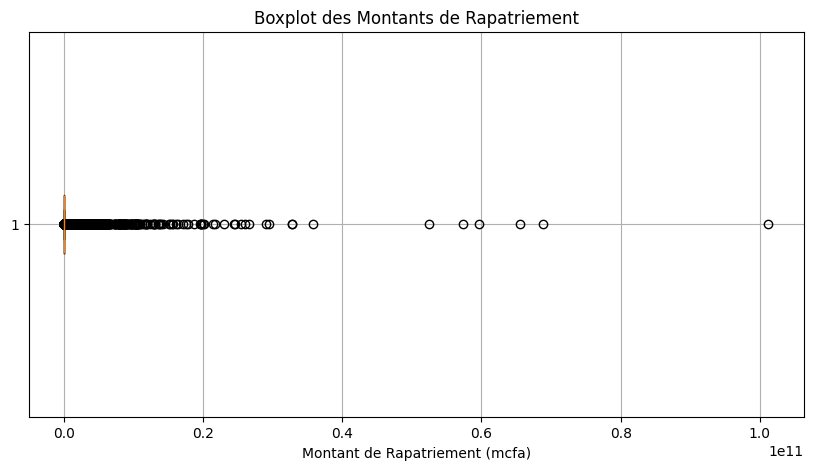

In [5]:
# Boxplot des montants de rapatriement
plt.figure(figsize=(10, 5))
plt.boxplot(rapatriement_data[' mcfa'], vert=False)
plt.title('Boxplot des Montants de Rapatriement')
plt.xlabel('Montant de Rapatriement (mcfa)')
plt.grid(True)
plt.show()

In [10]:
# Histogramme des clients les plus actifs
top_clients = rapatriement_data['nomcli'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_clients.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 des Clients les Plus Actifs')
plt.xlabel('Clients')
plt.ylabel('Nombre de Rapatriements')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

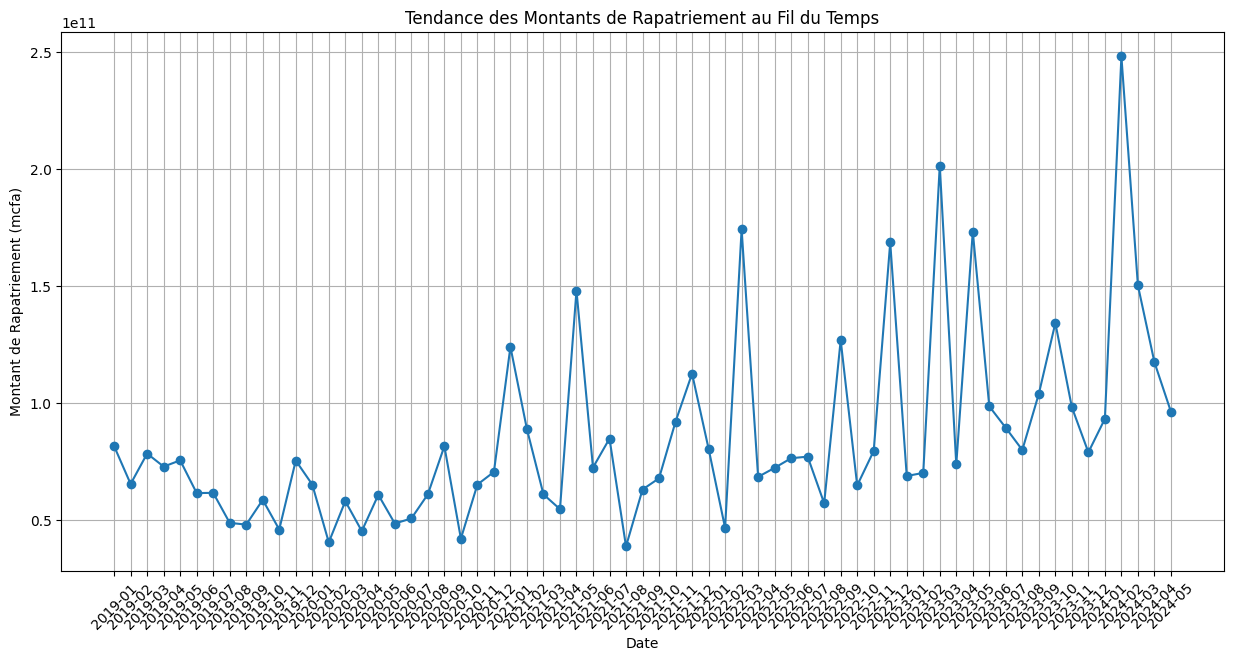

In [11]:
# Regroupement des données par mois et agrégation des montants de rapatriement
rapatriement_data['month'] = rapatriement_data['dou'].dt.to_period('M')
monthly_data = rapatriement_data.groupby('month')[' mcfa'].sum().reset_index()

# Tracer la série temporelle des montants de rapatriement par mois
plt.figure(figsize=(15, 7))
plt.plot(monthly_data['month'].astype(str), monthly_data[' mcfa'], marker='o', linestyle='-')
plt.title('Tendance des Montants de Rapatriement au Fil du Temps')
plt.xlabel('Date')
plt.ylabel('Montant de Rapatriement (mcfa)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

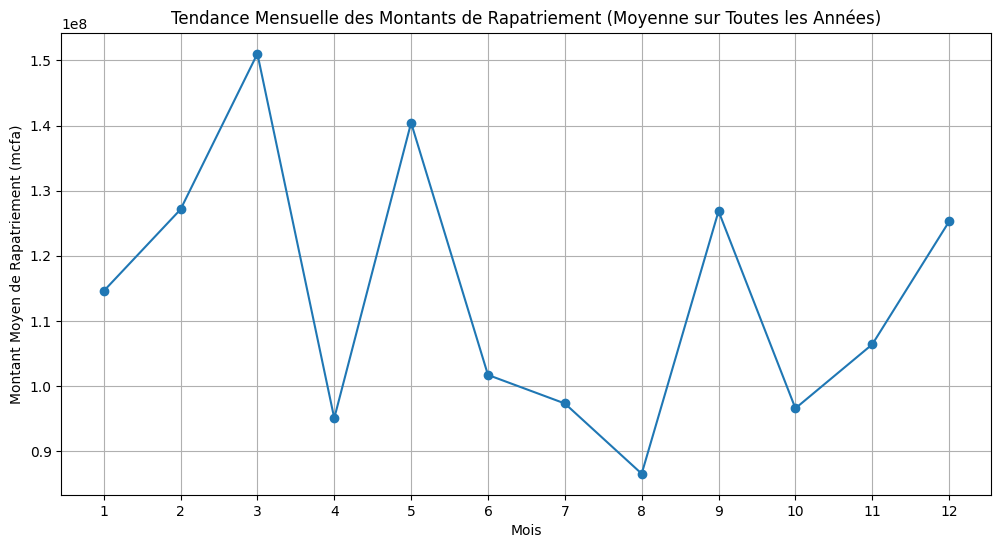

In [15]:
# Regrouper les données par mois et calculer la moyenne des montants de rapatriement
monthly_avg_data = rapatriement_data.groupby('month')[' mcfa'].mean().reset_index()

# Tracer la série temporelle des montants de rapatriement par mois avec la moyenne mensuelle
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_data['month'], monthly_avg_data[' mcfa'], marker='o', linestyle='-')
plt.title('Tendance Mensuelle des Montants de Rapatriement (Moyenne sur Toutes les Années)')
plt.xlabel('Mois')
plt.ylabel('Montant Moyen de Rapatriement (mcfa)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Top 10 des Ordonnateurs:
nomdo
SABODALA GOLD OPERATIONS SA            6.771974e+11
GRANDE COTE OPERATIONS SA              3.559774e+11
STONEX COMMODITIES DMCC                2.214945e+11
WOODSIDE ENERGY FINANCE (UK) LIMI      2.071964e+11
SOC GEN PARIS FR                       1.701005e+11
CHINA ROAD AND BRIDGE CORP ADD.UNIT    1.610079e+11
                                       1.291612e+11
INTERNATIONAL FINANCE CORPORATION      9.651066e+10
EGC/E SENEGAL/E RAIL/YAPI/CSE          9.281369e+10
HELIOS TOWERS PARTNERS (UK) LTD        8.683040e+10
Name:  mcfa, dtype: float64

Top 10 des Bénéficiaires:
nomcli
SABODALA GOLD OPERATIONS                1.018421e+12
GRANDE COTE OPERATION                   4.242648e+11
ETAT DU SENEGAL                         4.113141e+11
CHINA ROAD AND BRIDGE CORP SENEGAL      2.176015e+11
PETROSEN  SANGOMAR  USD                 2.104620e+11
SENECOR                                 1.555350e+11
AEROPORT INTERNATIONAL BLAISE DIAGNE    1.304051e+11
DP WORLD DAKAR  

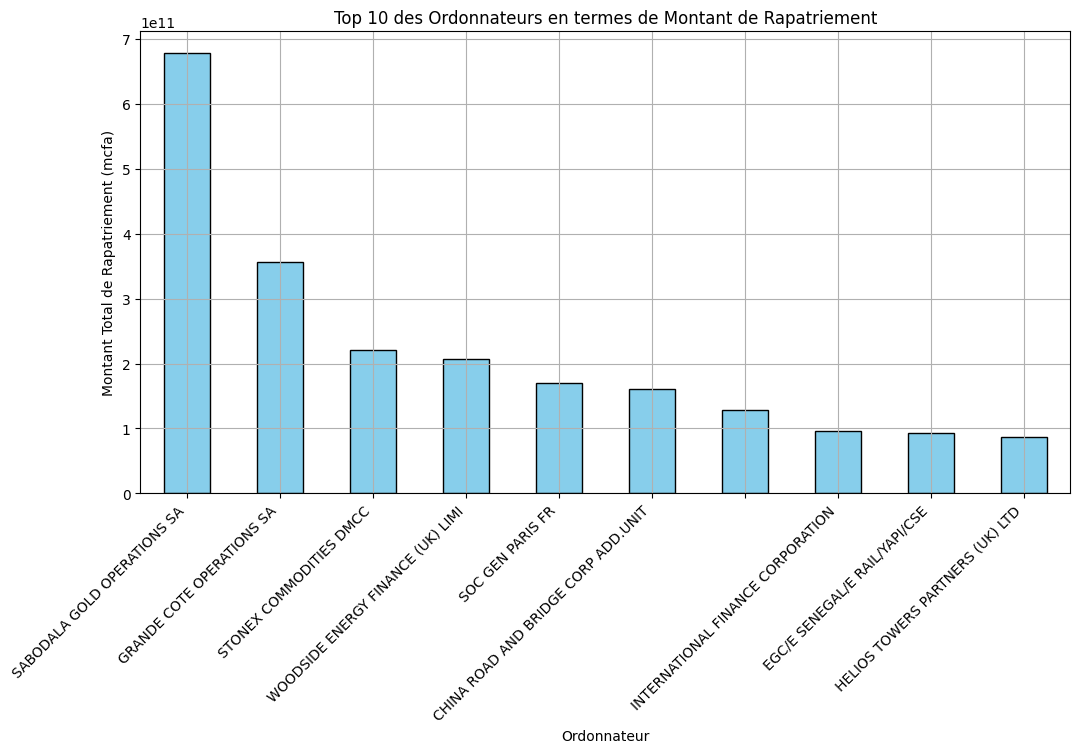

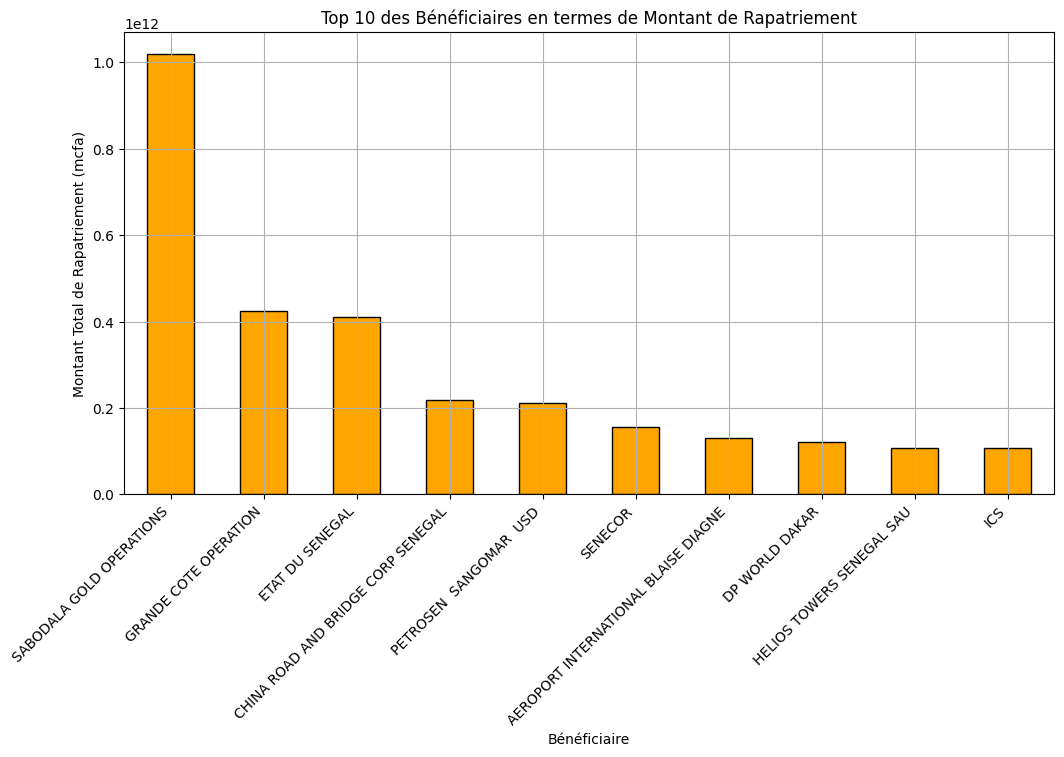

In [16]:
# Calculer les montants totaux de rapatriement pour chaque ordonnateur
top_ordonnateurs = rapatriement_data.groupby('nomdo')[' mcfa'].sum().sort_values(ascending=False).head(10)

# Calculer les montants totaux de rapatriement pour chaque bénéficiaire
top_beneficiaires = rapatriement_data.groupby('nomcli')[' mcfa'].sum().sort_values(ascending=False).head(10)

# Afficher les top 10 des ordonnateurs et des bénéficiaires
print("Top 10 des Ordonnateurs:")
print(top_ordonnateurs)
print("\nTop 10 des Bénéficiaires:")
print(top_beneficiaires)

# Tracer des graphiques en barres pour les top 10 des ordonnateurs
plt.figure(figsize=(12, 6))
top_ordonnateurs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 des Ordonnateurs en termes de Montant de Rapatriement')
plt.xlabel('Ordonnateur')
plt.ylabel('Montant Total de Rapatriement (mcfa)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tracer des graphiques en barres pour les top 10 des bénéficiaires
plt.figure(figsize=(12, 6))
top_beneficiaires.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 des Bénéficiaires en termes de Montant de Rapatriement')
plt.xlabel('Bénéficiaire')
plt.ylabel('Montant Total de Rapatriement (mcfa)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Top 10 des Bénéficiaires pour l'Ordonnateur SABODALA GOLD OPERATIONS SA:
nomcli
SABODALA GOLD OPERATIONS    6.771974e+11
Name:  mcfa, dtype: float64


Top 10 des Bénéficiaires pour l'Ordonnateur GRANDE COTE OPERATIONS SA:
nomcli
GRANDE COTE OPERATION    3.559774e+11
Name:  mcfa, dtype: float64


Top 10 des Bénéficiaires pour l'Ordonnateur STONEX COMMODITIES DMCC:
nomcli
SABODALA GOLD OPERATIONS    2.214945e+11
Name:  mcfa, dtype: float64


Top 10 des Bénéficiaires pour l'Ordonnateur WOODSIDE ENERGY FINANCE (UK) LIMI:
nomcli
PETROSEN  SANGOMAR  USD    2.071964e+11
Name:  mcfa, dtype: float64


Top 10 des Bénéficiaires pour l'Ordonnateur SOC GEN PARIS FR:
nomcli
ETAT DU SENEGAL    1.701005e+11
Name:  mcfa, dtype: float64


Top 10 des Bénéficiaires pour l'Ordonnateur CHINA ROAD AND BRIDGE CORP ADD.UNIT:
nomcli
CHINA ROAD AND BRIDGE CORP SENEGAL    1.610079e+11
Name:  mcfa, dtype: float64


Top 10 des Bénéficiaires pour l'Ordonnateur  :
nomcli
PETOWAL MINING COMPANY SA              8.61429

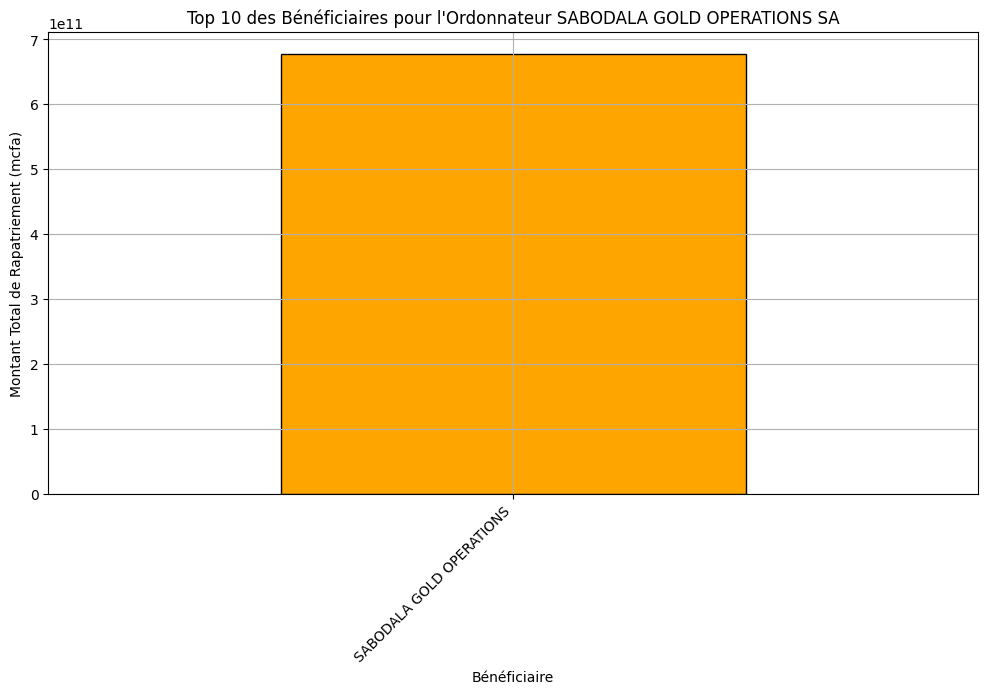

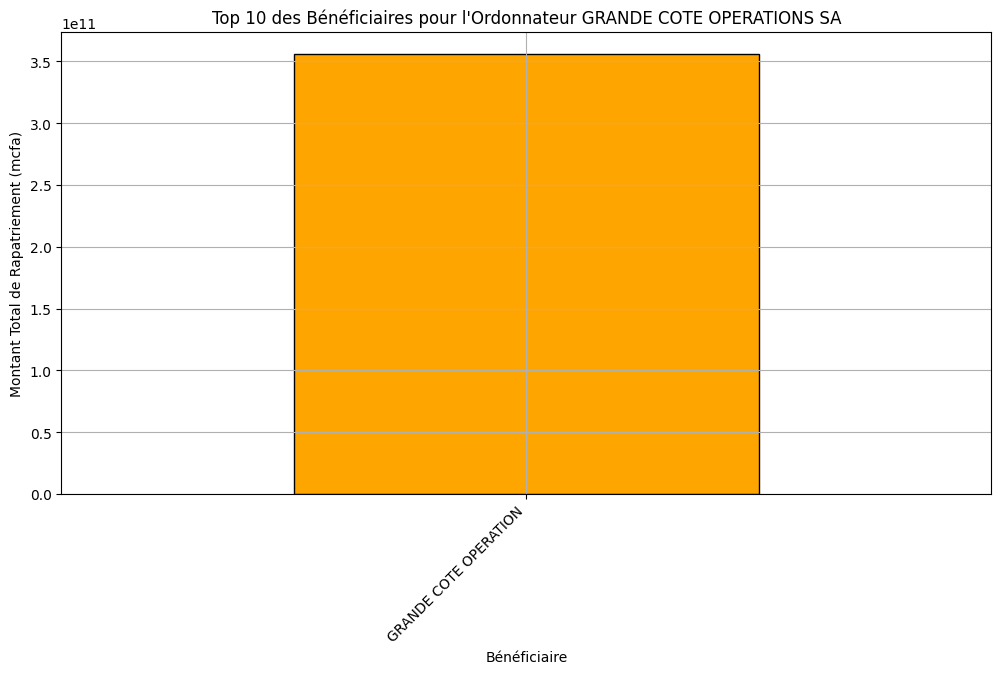

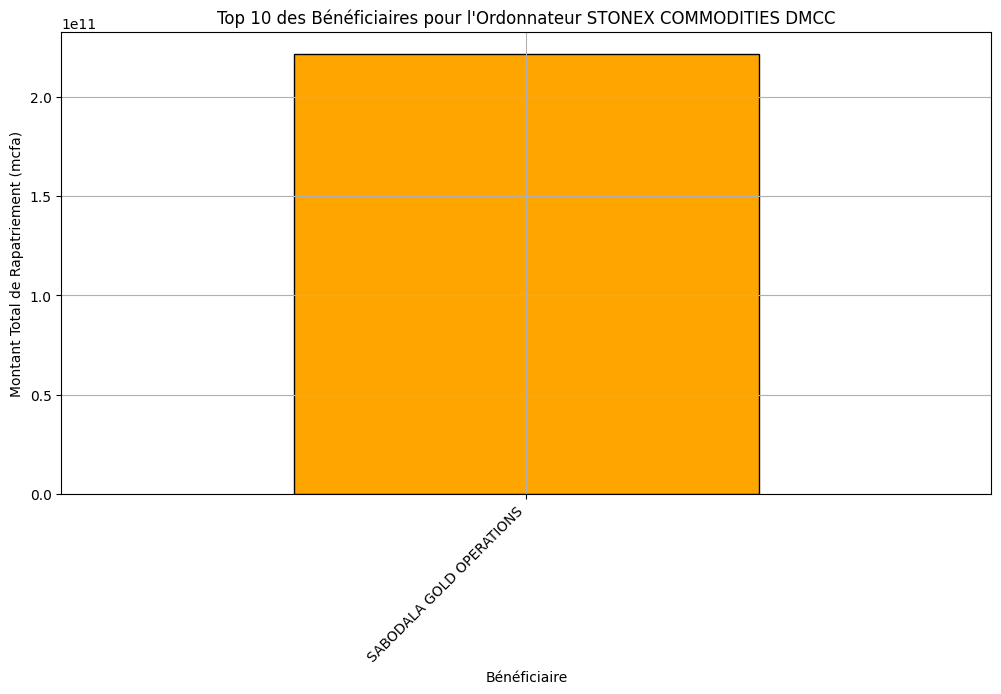

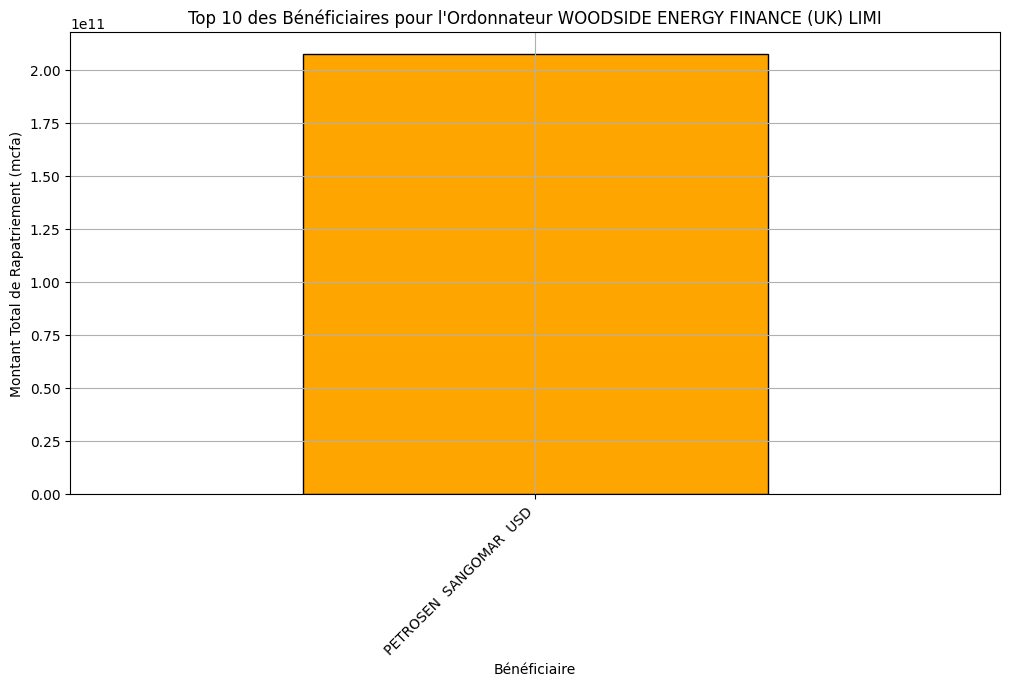

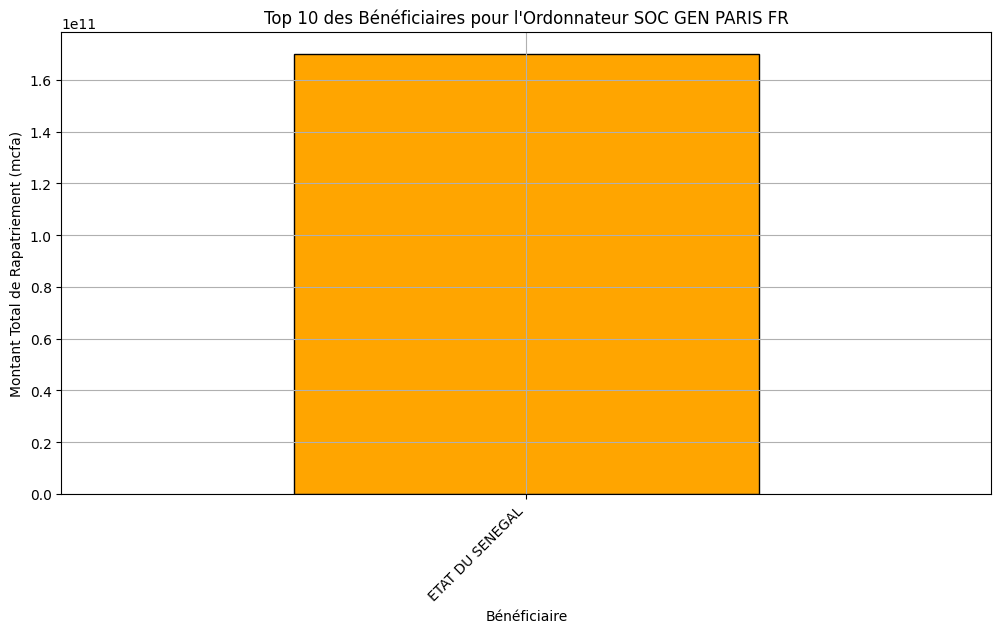

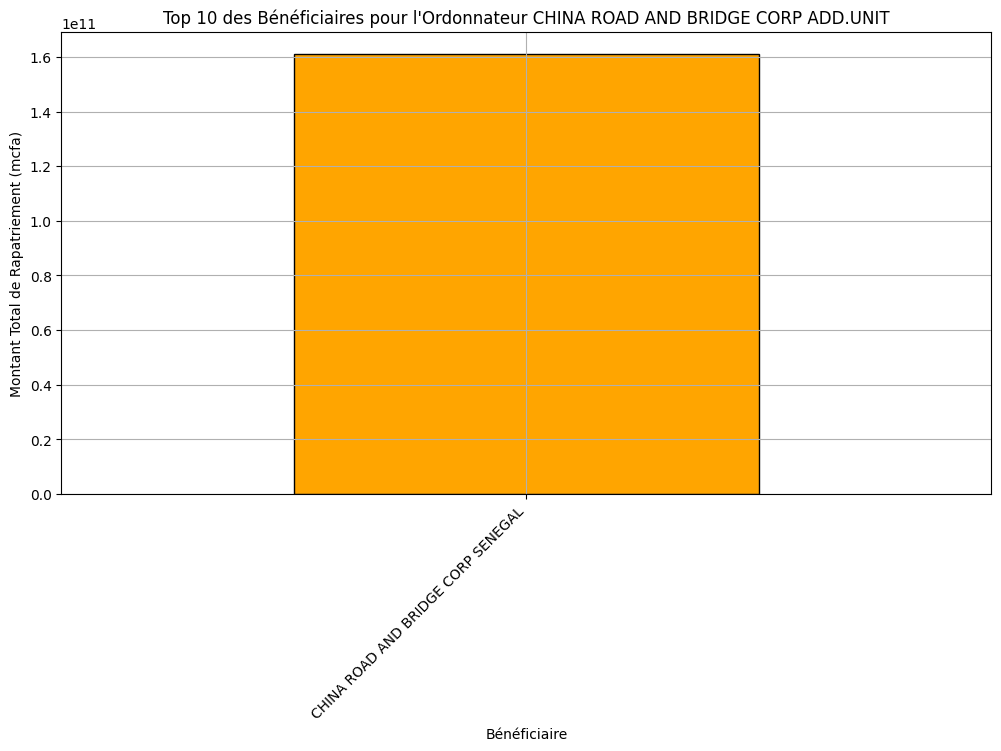

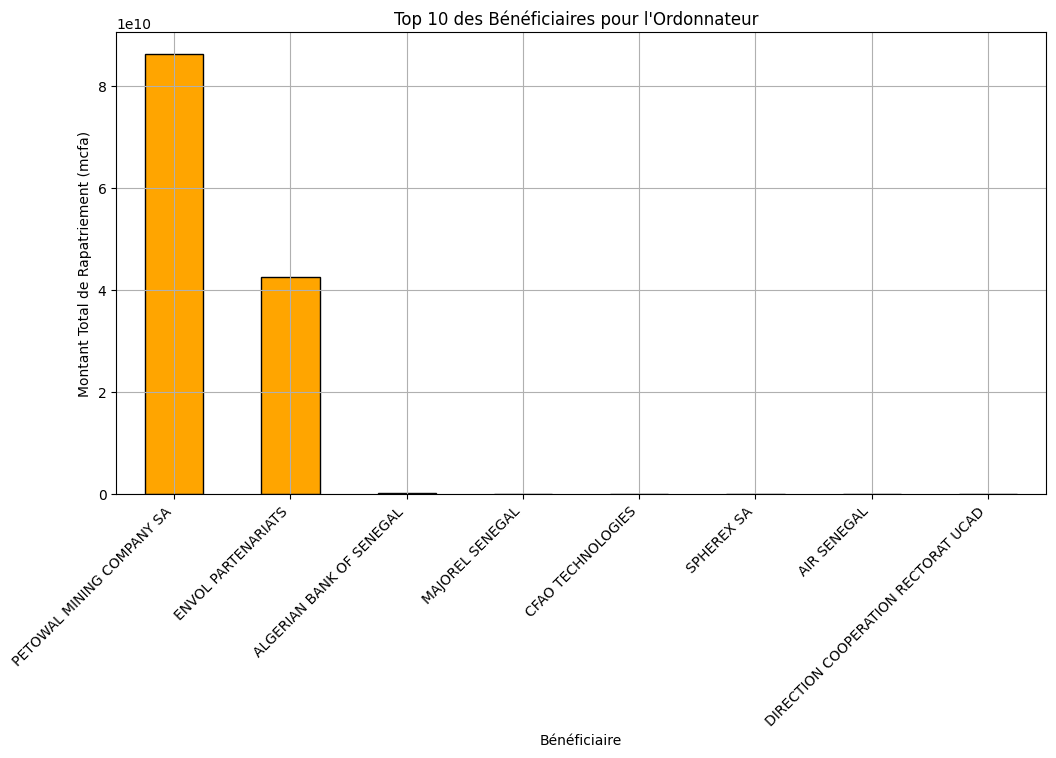

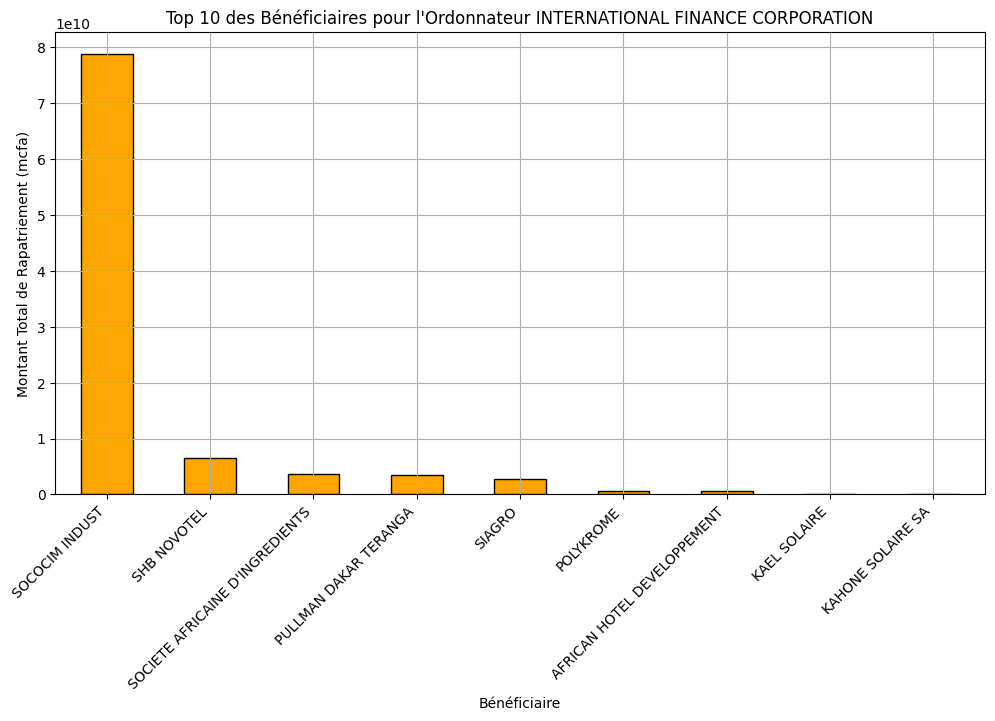

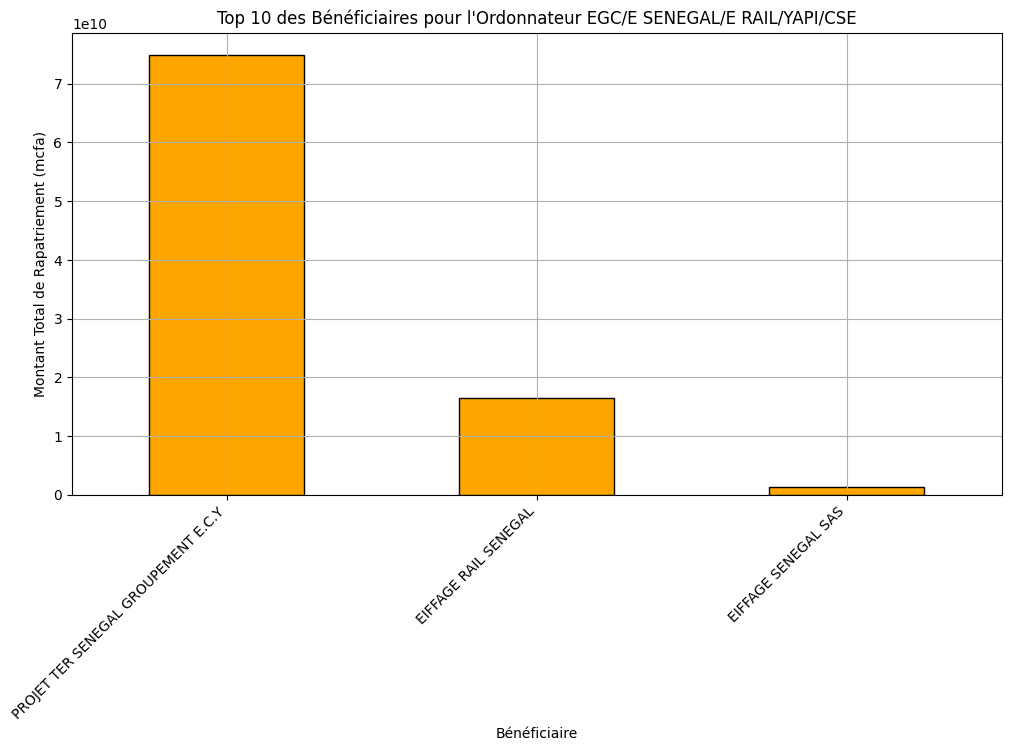

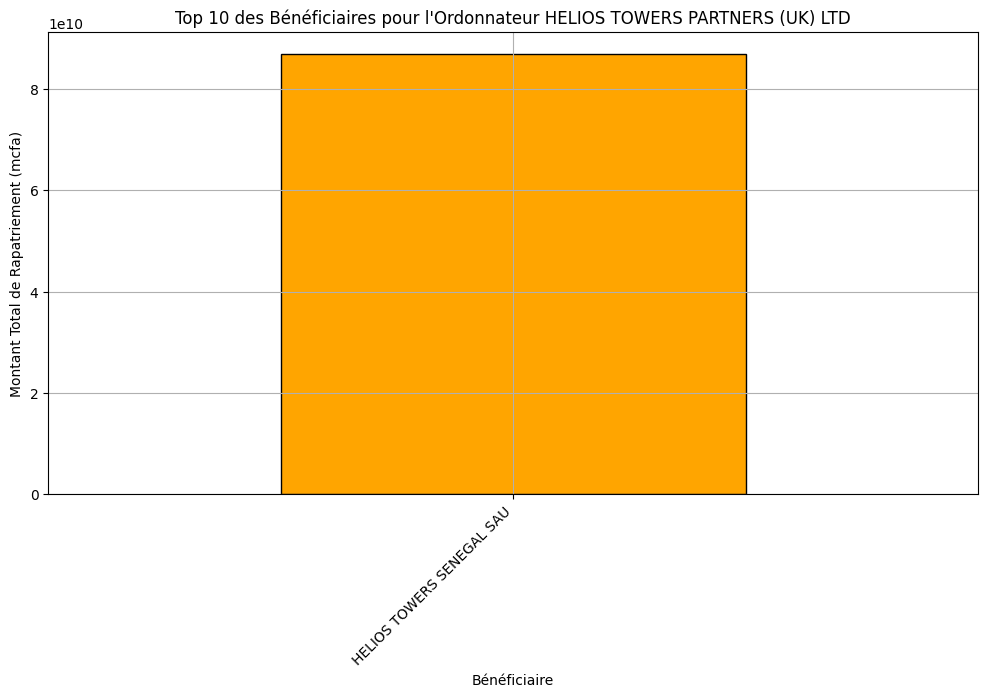

In [17]:
# Identifier les top 10 ordonnateurs en termes de montants de rapatriement
top_ordonnateurs = rapatriement_data.groupby('nomdo')[' mcfa'].sum().sort_values(ascending=False).head(10).index

# Filtrer les données pour ne conserver que les transactions des top 10 ordonnateurs
filtered_data = rapatriement_data[rapatriement_data['nomdo'].isin(top_ordonnateurs)]

# Initialiser un dictionnaire pour stocker les top 10 bénéficiaires de chaque ordonnateur
top_beneficiaires_dict = {}

# Calculer les montants totaux de rapatriement pour chaque bénéficiaire de chaque ordonnateur
for ordonnateur in top_ordonnateurs:
    top_beneficiaires = filtered_data[filtered_data['nomdo'] == ordonnateur].groupby('nomcli')[' mcfa'].sum().sort_values(ascending=False).head(10)
    top_beneficiaires_dict[ordonnateur] = top_beneficiaires

# Afficher les top 10 bénéficiaires pour chaque top 10 ordonnateur
for ordonnateur, beneficiaires in top_beneficiaires_dict.items():
    print(f"Top 10 des Bénéficiaires pour l'Ordonnateur {ordonnateur}:")
    print(beneficiaires)
    print("\n")

# Tracer des graphiques en barres pour les top 10 bénéficiaires de chaque top 10 ordonnateur
for ordonnateur, beneficiaires in top_beneficiaires_dict.items():
    plt.figure(figsize=(12, 6))
    beneficiaires.plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Top 10 des Bénéficiaires pour l\'Ordonnateur {ordonnateur}')
    plt.xlabel('Bénéficiaire')
    plt.ylabel('Montant Total de Rapatriement (mcfa)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

Top 10 des Ordonnateurs pour le Bénéficiaire SABODALA GOLD OPERATIONS:
nomdo
SABODALA GOLD OPERATIONS SA            6.771974e+11
STONEX COMMODITIES DMCC                2.214945e+11
METALOR TECHNOLOGIES SA                4.288622e+10
SABODALA GOLD                          2.663641e+10
Metalor Technologies SA                2.048999e+10
AURAMET INTERNATIONAL LLC              1.894292e+10
AURAMET INTL                           4.327143e+09
SABODALA                               3.676200e+09
ENDEAVOUR CANADA HOLDINGS CORPORATI    1.081963e+09
STONEX COMMODITIES                     9.097031e+08
Name:  mcfa, dtype: float64


Top 10 des Ordonnateurs pour le Bénéficiaire GRANDE COTE OPERATION:
nomdo
GRANDE COTE OPERATIONS SA    3.559774e+11
METAL SECURITIES             2.848592e+10
TIZIR LTD                    2.186465e+10
GRANDE COTE OPERATION        1.213912e+10
GCO                          5.797663e+09
METAL CURRENCIES             6.559570e+02
Name:  mcfa, dtype: float64


Top 10 des Ordonn

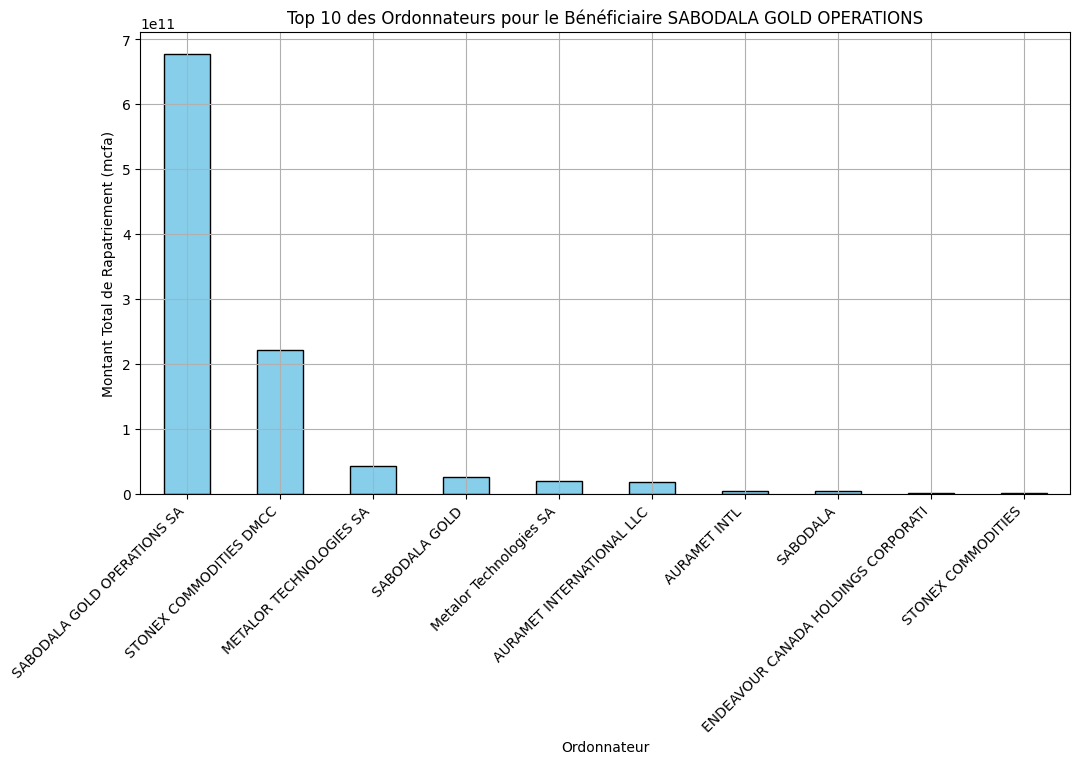

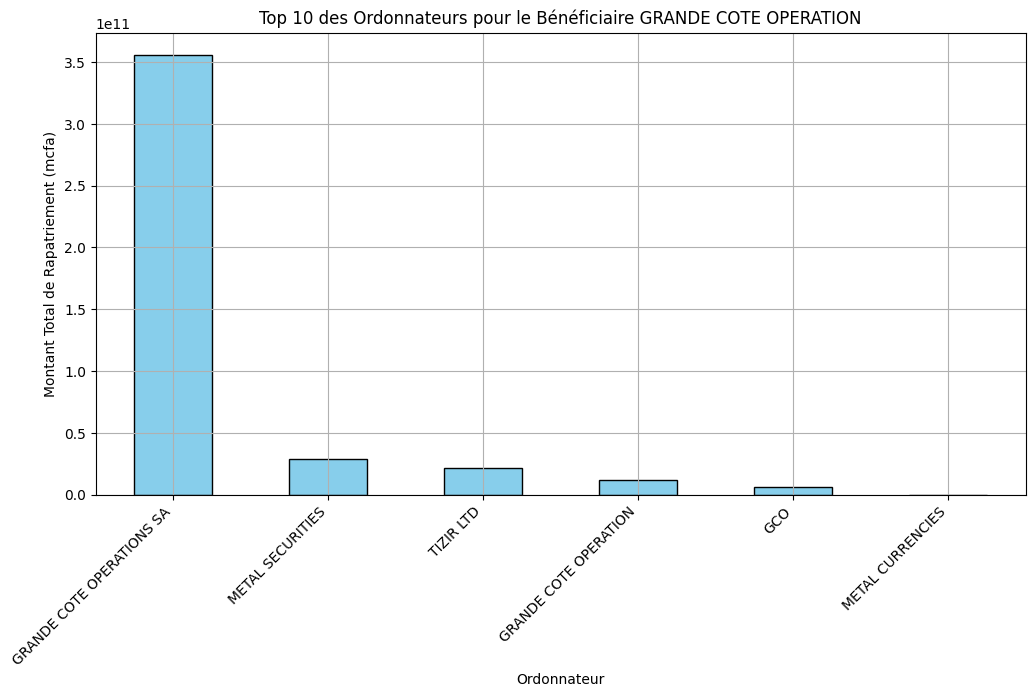

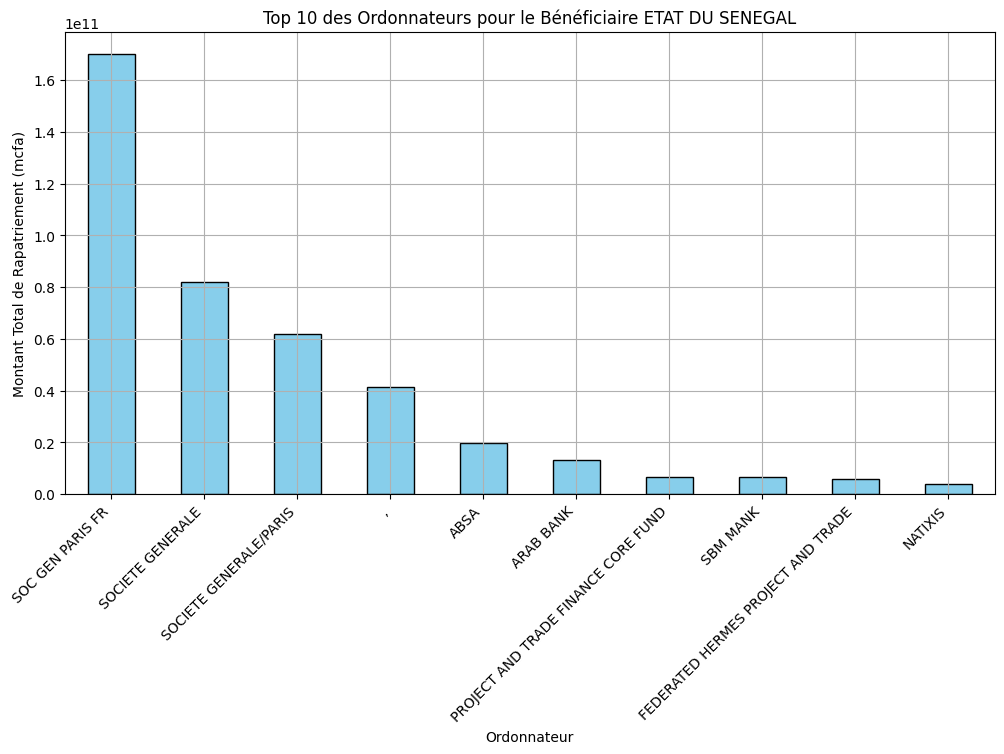

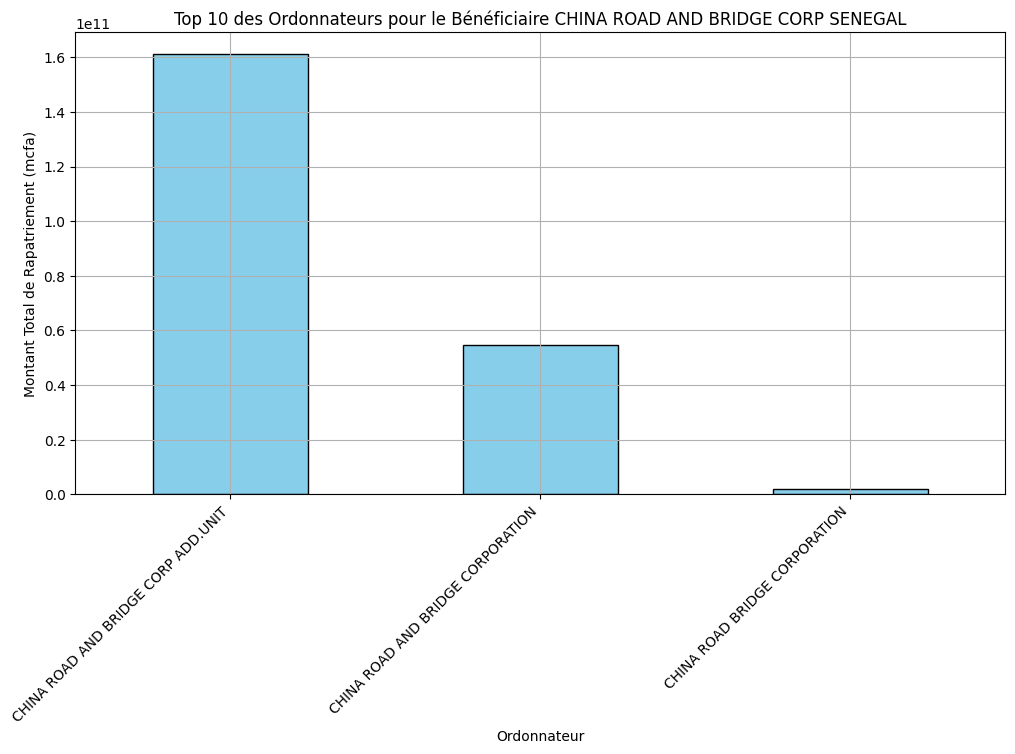

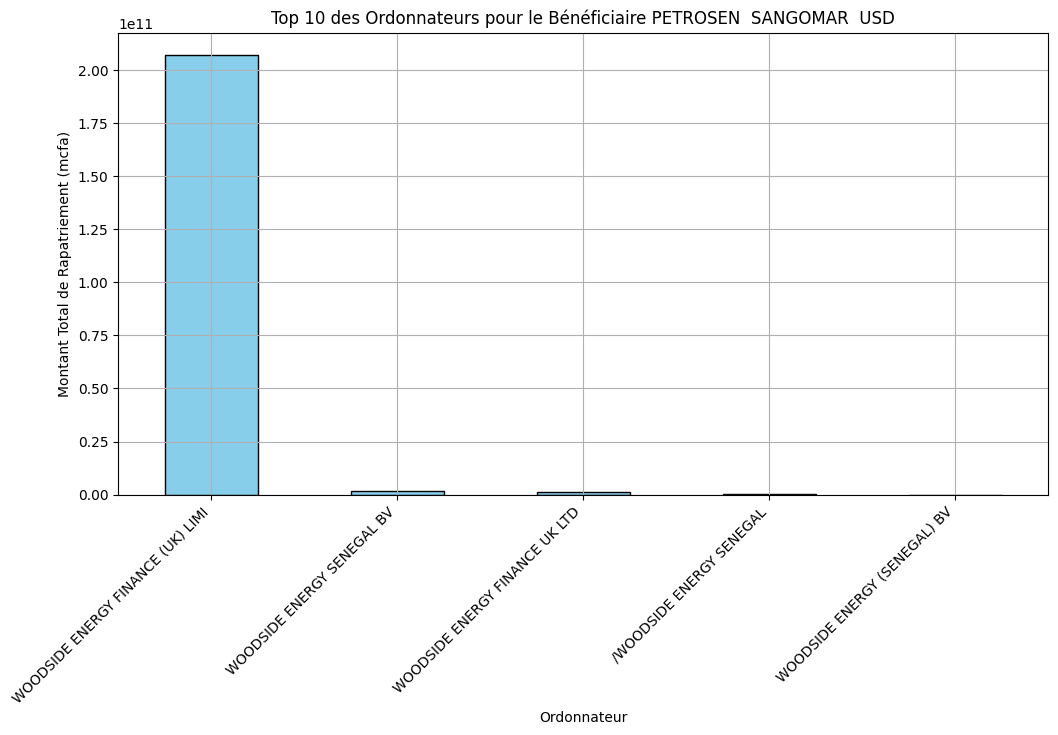

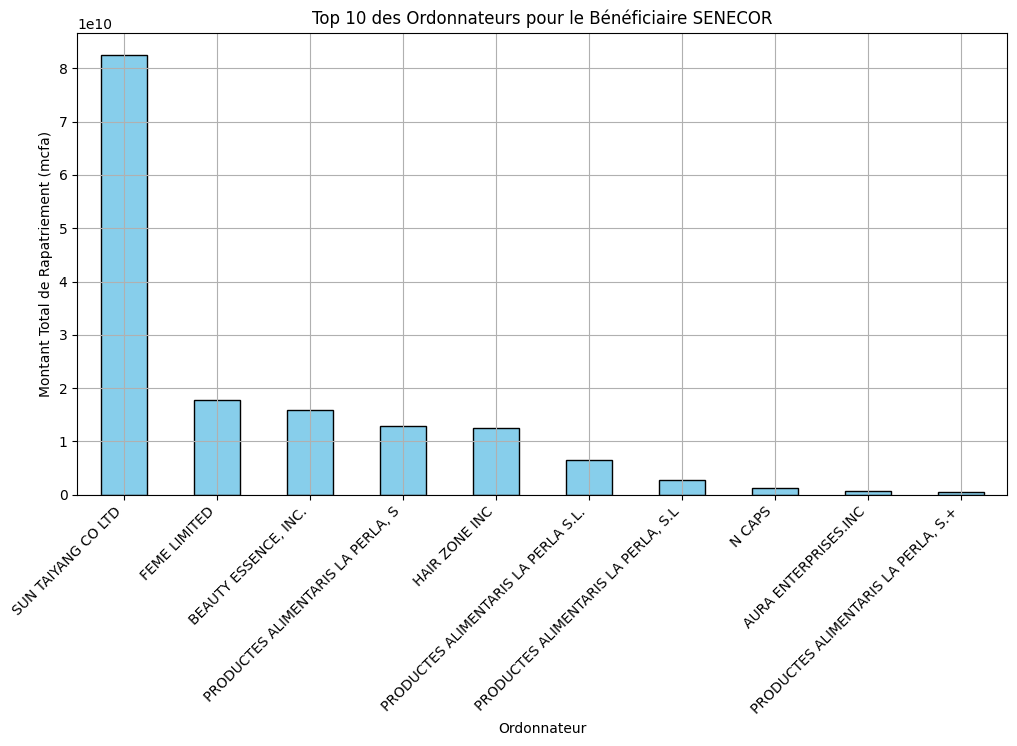

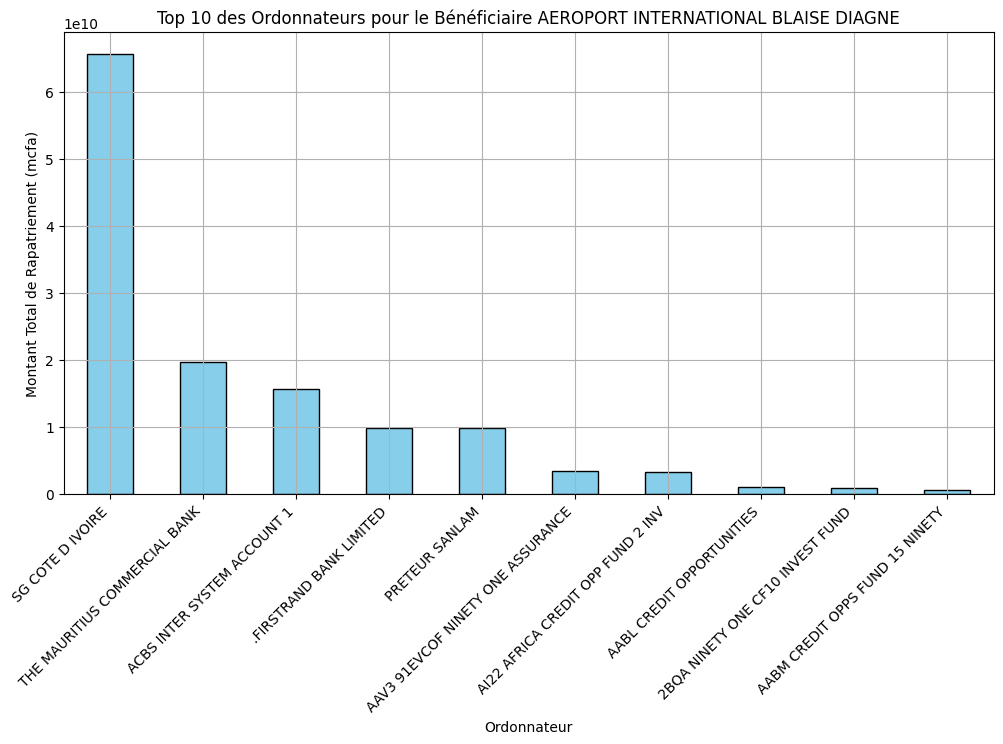

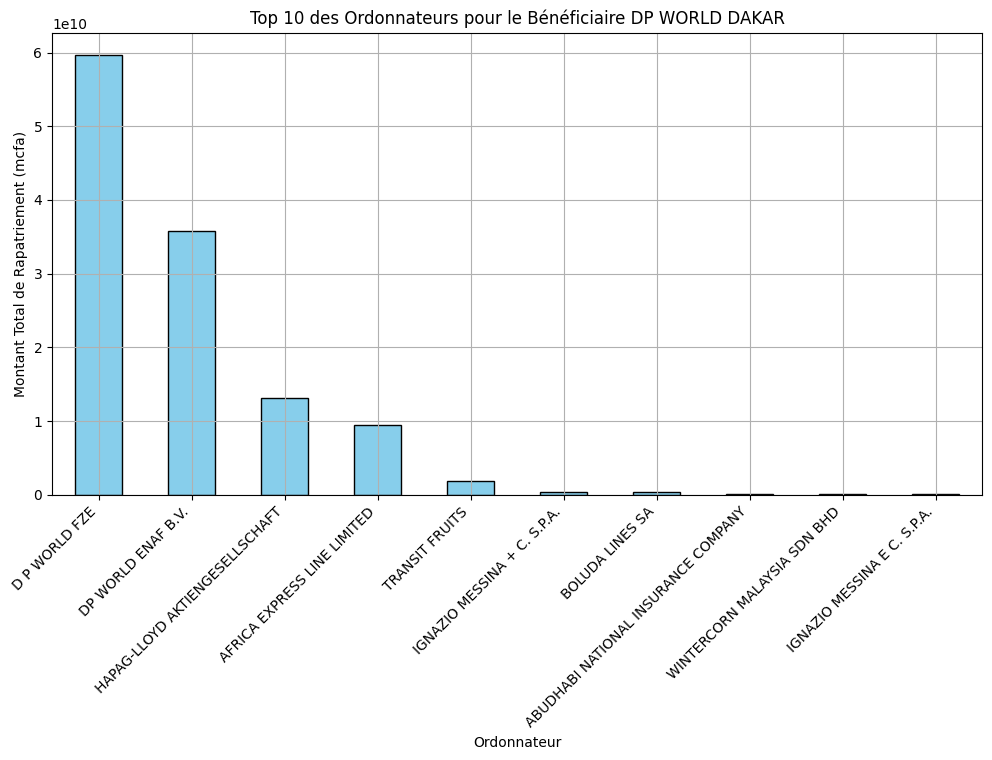

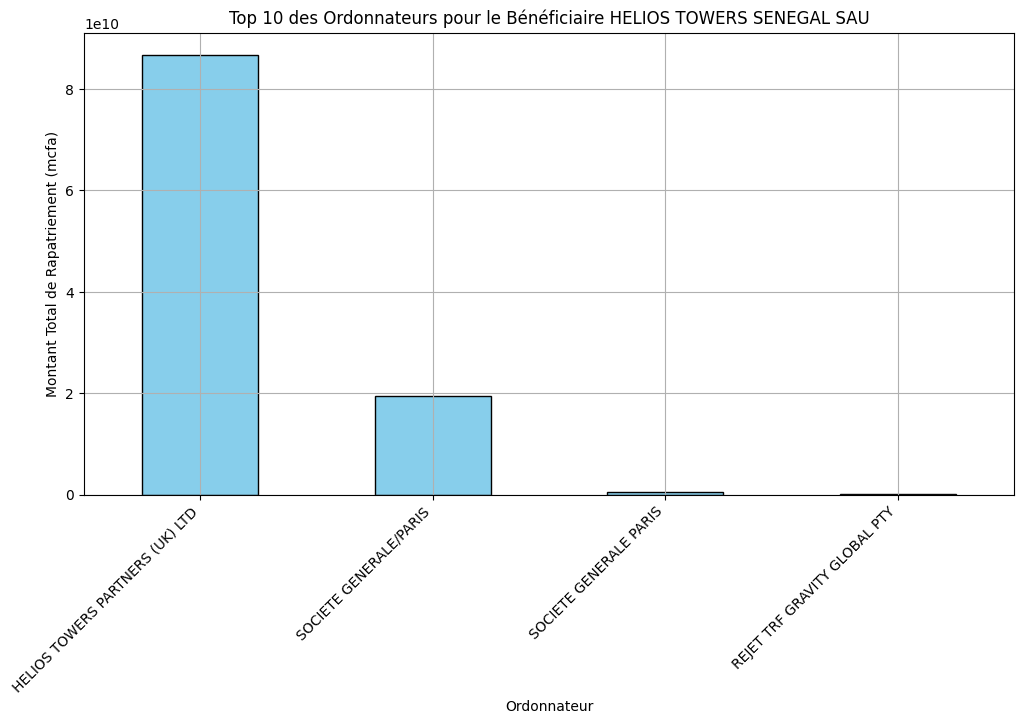

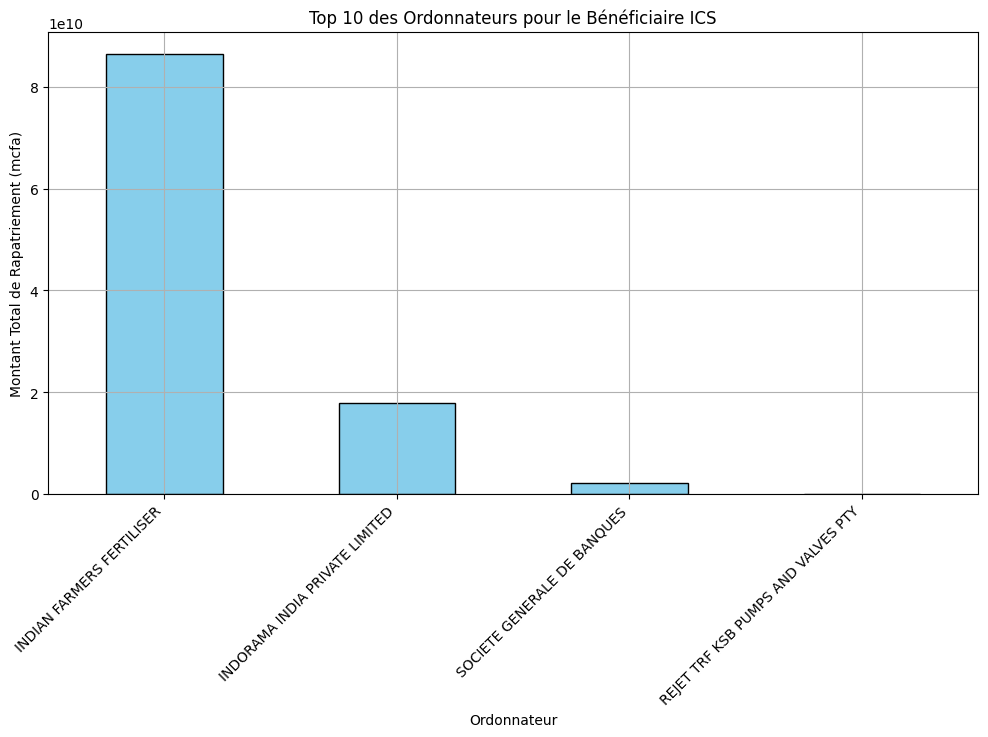

In [18]:
# Identifier les top 10 bénéficiaires en termes de montants de rapatriement
top_beneficiaires = rapatriement_data.groupby('nomcli')[' mcfa'].sum().sort_values(ascending=False).head(10).index

# Filtrer les données pour ne conserver que les transactions des top 10 bénéficiaires
filtered_data = rapatriement_data[rapatriement_data['nomcli'].isin(top_beneficiaires)]

# Initialiser un dictionnaire pour stocker les top 10 ordonnateurs de chaque bénéficiaire
top_ordonnateurs_dict = {}

# Calculer les montants totaux de rapatriement pour chaque ordonnateur de chaque bénéficiaire
for beneficiaire in top_beneficiaires:
    top_ordonnateurs = filtered_data[filtered_data['nomcli'] == beneficiaire].groupby('nomdo')[' mcfa'].sum().sort_values(ascending=False).head(10)
    top_ordonnateurs_dict[beneficiaire] = top_ordonnateurs

# Afficher les top 10 ordonnateurs pour chaque top 10 bénéficiaire
for beneficiaire, ordonnateurs in top_ordonnateurs_dict.items():
    print(f"Top 10 des Ordonnateurs pour le Bénéficiaire {beneficiaire}:")
    print(ordonnateurs)
    print("\n")

# Tracer des graphiques en barres pour les top 10 ordonnateurs de chaque top 10 bénéficiaire
for beneficiaire, ordonnateurs in top_ordonnateurs_dict.items():
    plt.figure(figsize=(12, 6))
    ordonnateurs.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top 10 des Ordonnateurs pour le Bénéficiaire {beneficiaire}')
    plt.xlabel('Ordonnateur')
    plt.ylabel('Montant Total de Rapatriement (mcfa)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23160\3295411695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['dou'].dt.to_period('M')


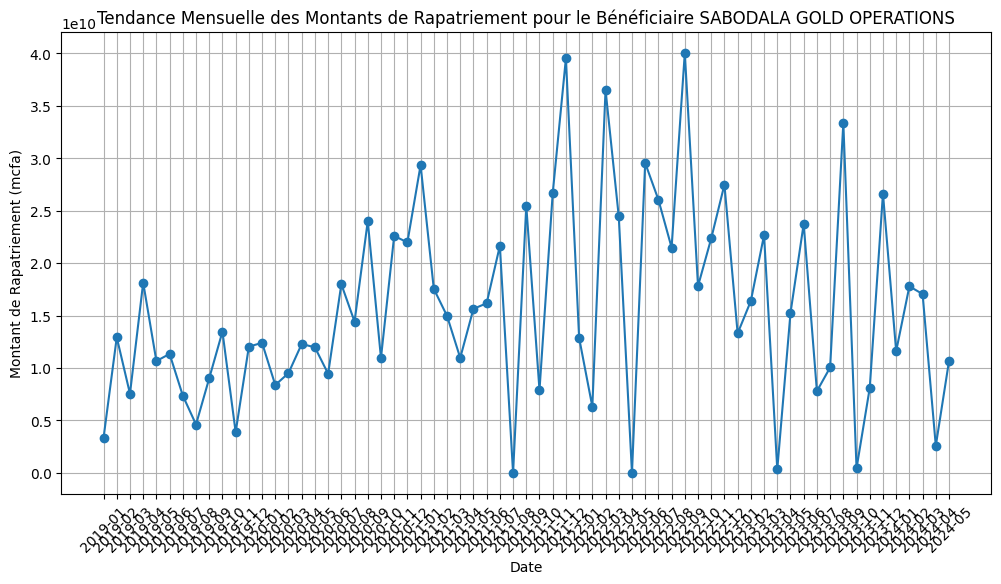

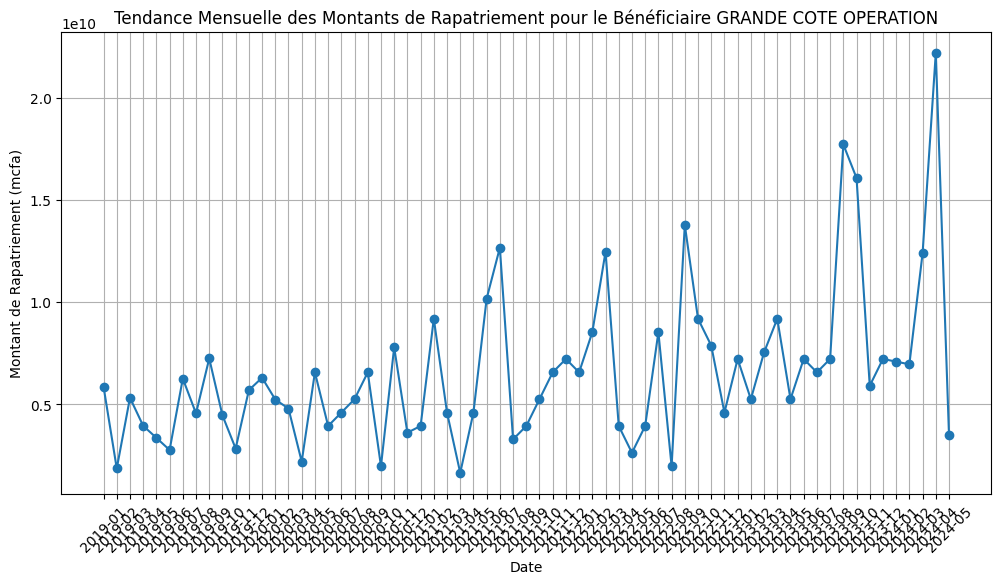

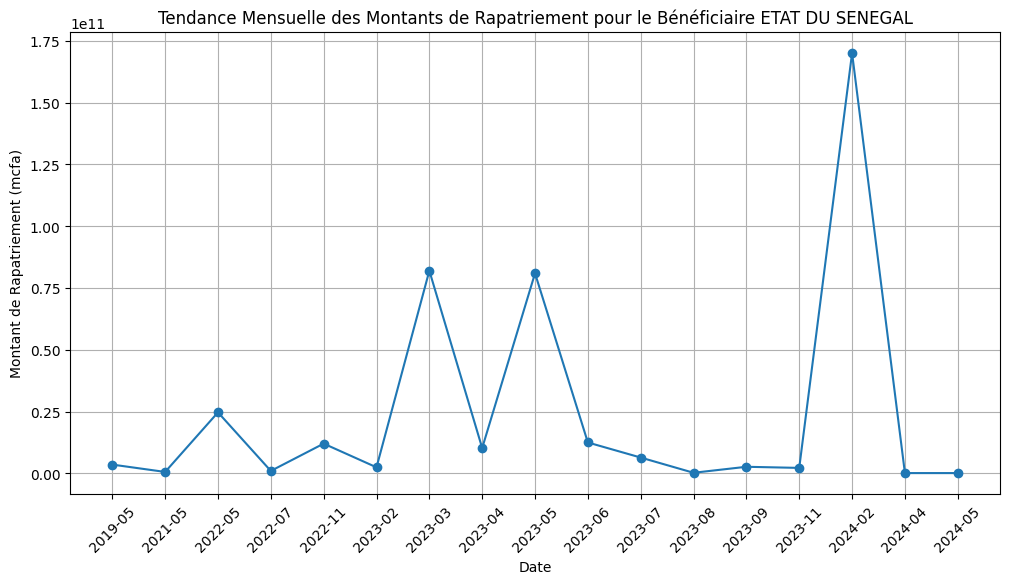

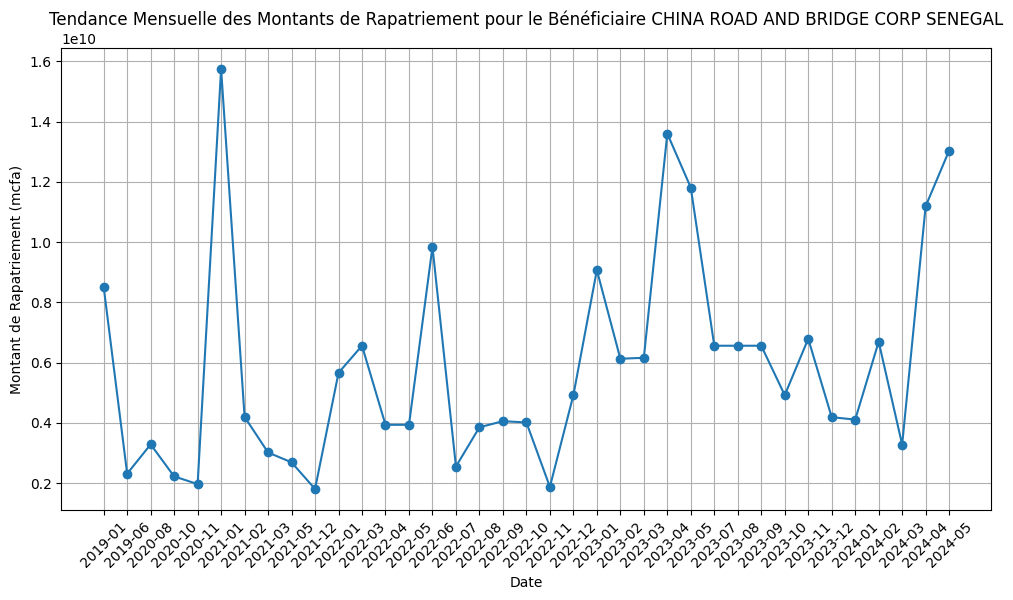

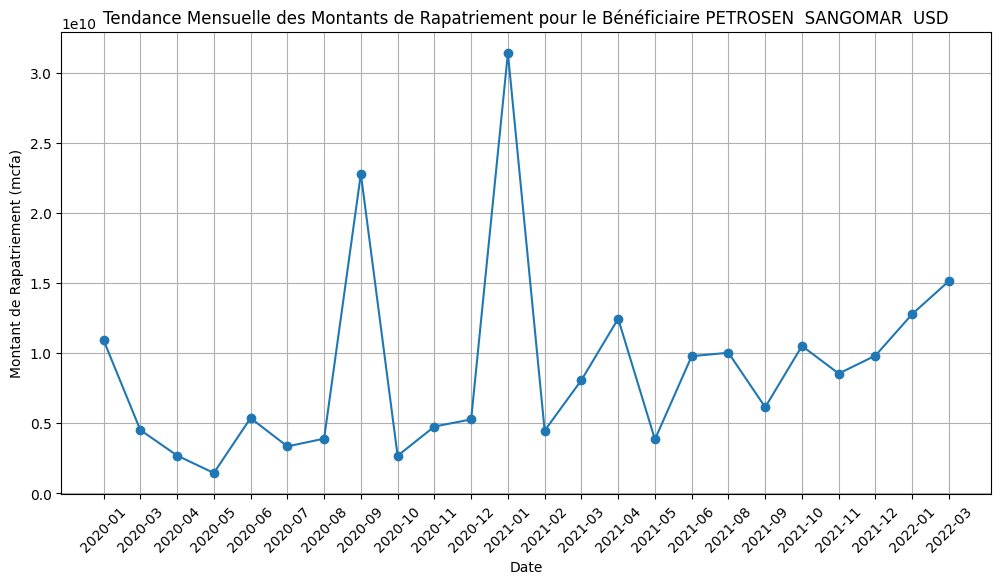

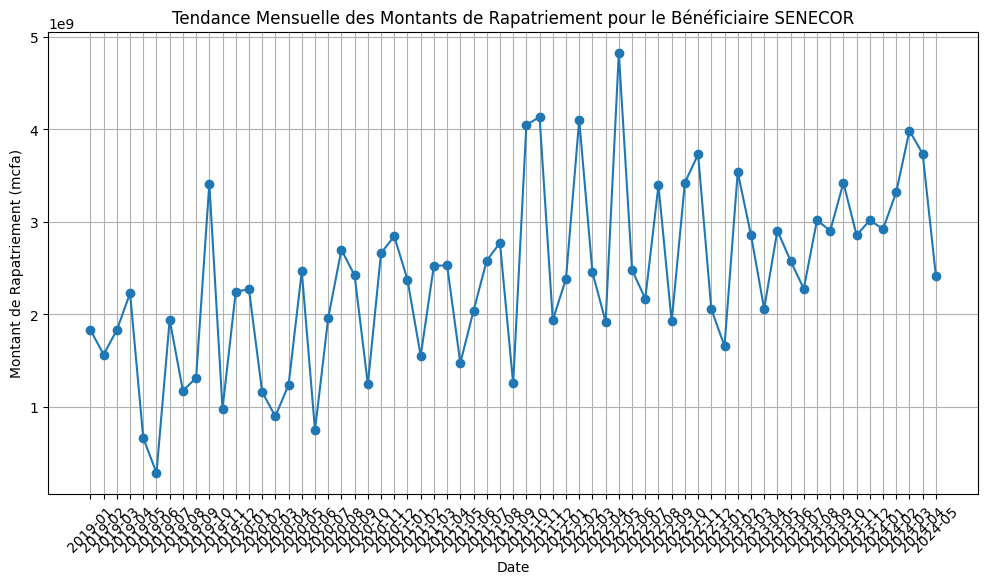

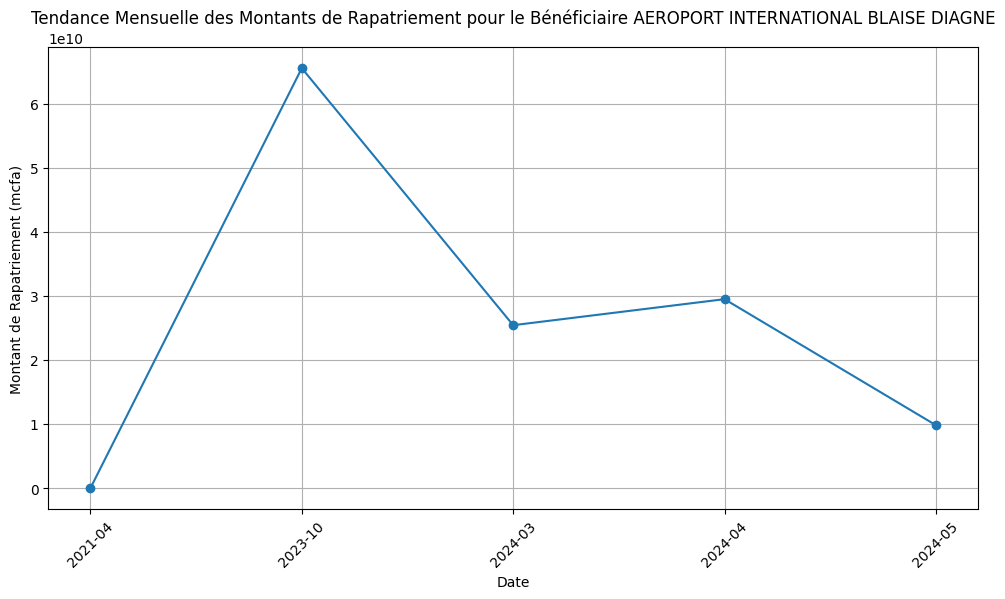

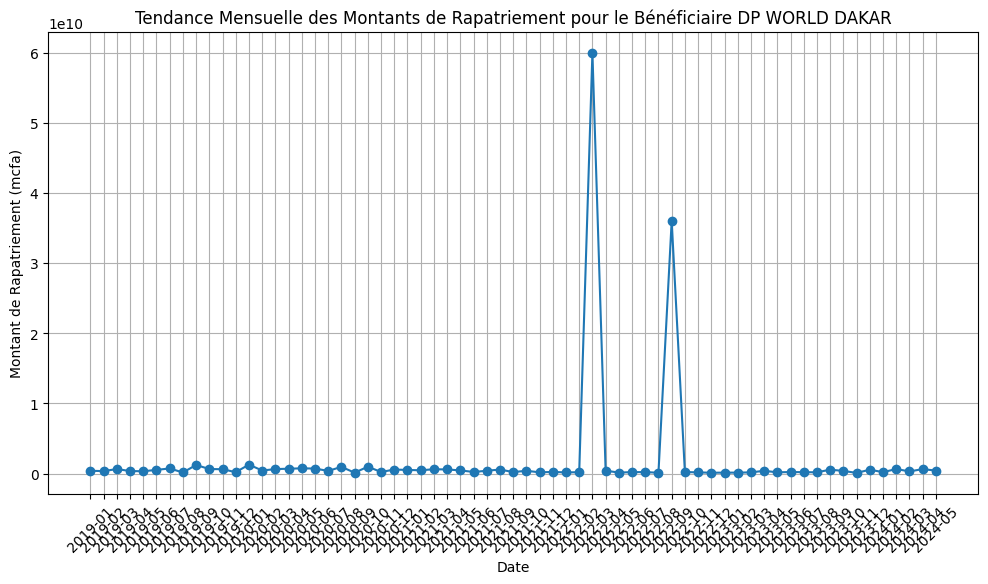

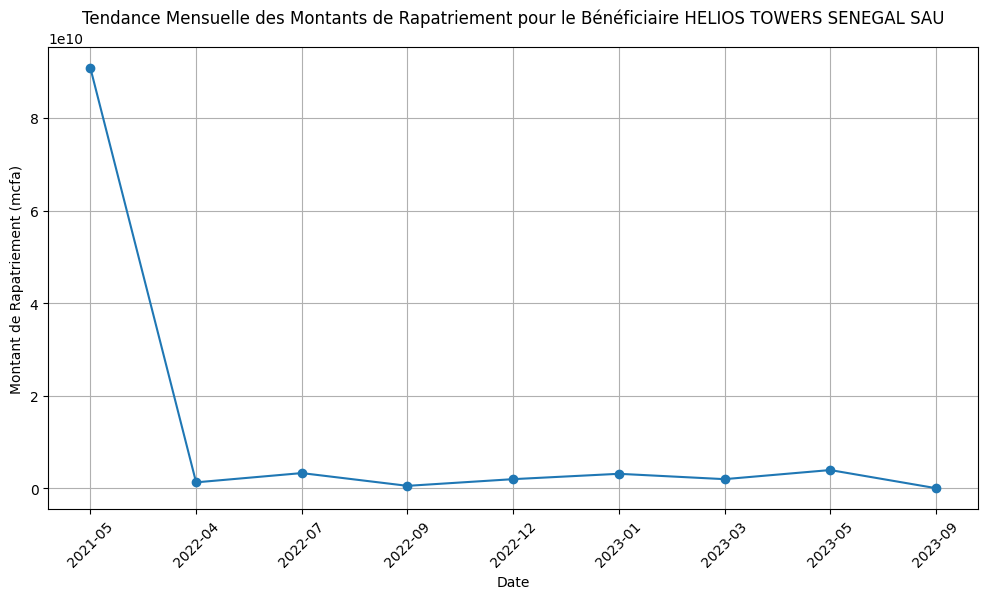

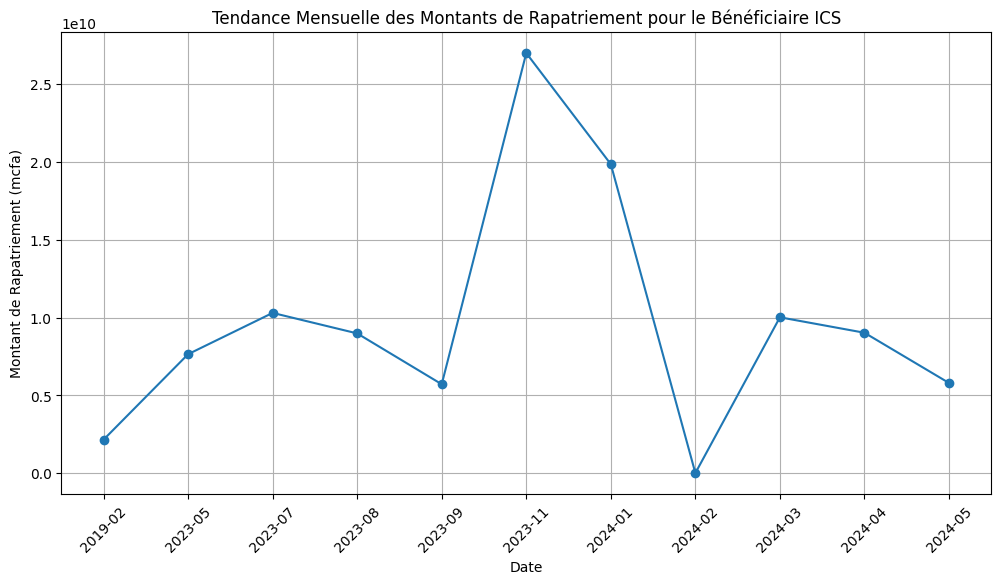

In [20]:
# Créer une colonne pour le mois
filtered_data['month'] = filtered_data['dou'].dt.to_period('M')

# Initialiser un dictionnaire pour stocker les données mensuelles par bénéficiaire
beneficiaires_trend = {}

# Regrouper les données par bénéficiaire et par mois
for beneficiaire in top_beneficiaires:
    monthly_data = filtered_data[filtered_data['nomcli'] == beneficiaire].groupby('month')[' mcfa'].sum().reset_index()
    beneficiaires_trend[beneficiaire] = monthly_data

# Tracer un graphique distinct pour chaque bénéficiaire montrant la série temporelle des montants de rapatriement
for beneficiaire, data in beneficiaires_trend.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['month'].astype(str), data[' mcfa'], marker='o', linestyle='-')
    plt.title(f'Tendance Mensuelle des Montants de Rapatriement pour le Bénéficiaire {beneficiaire}')
    plt.xlabel('Date')
    plt.ylabel('Montant de Rapatriement (mcfa)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

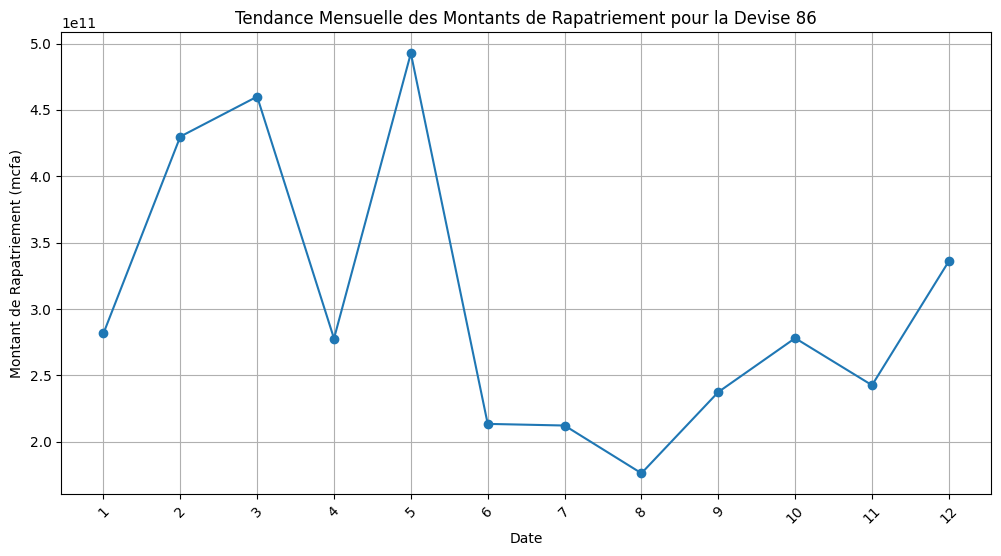

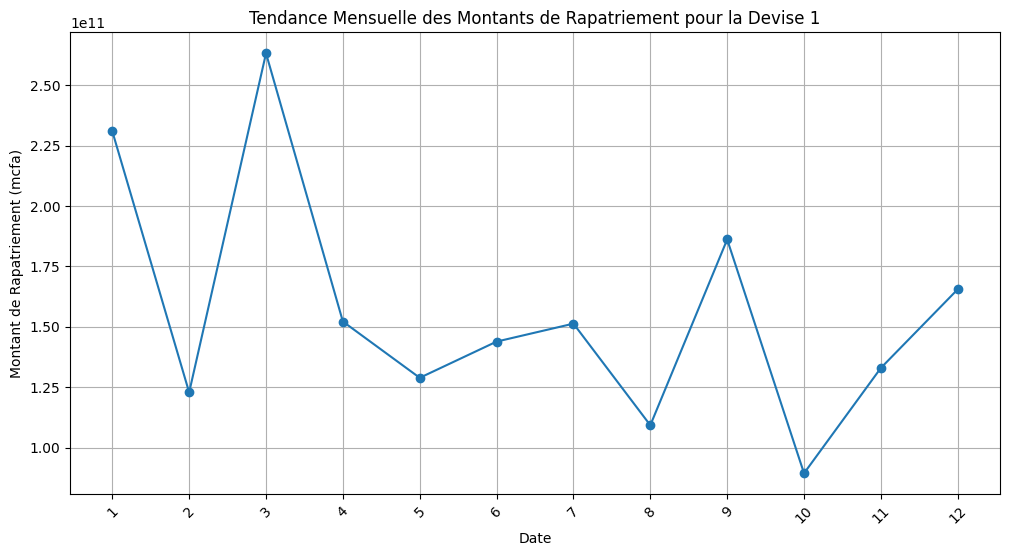

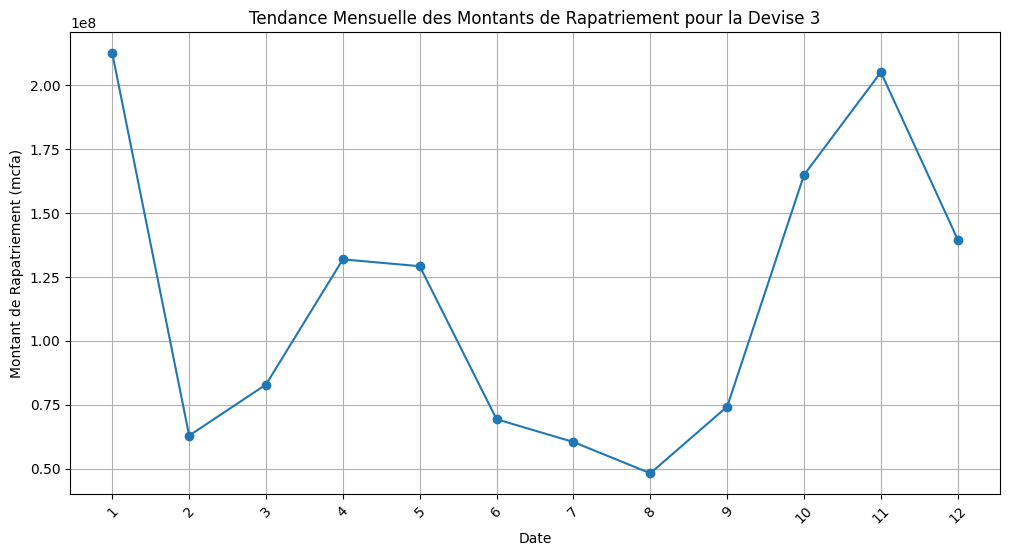

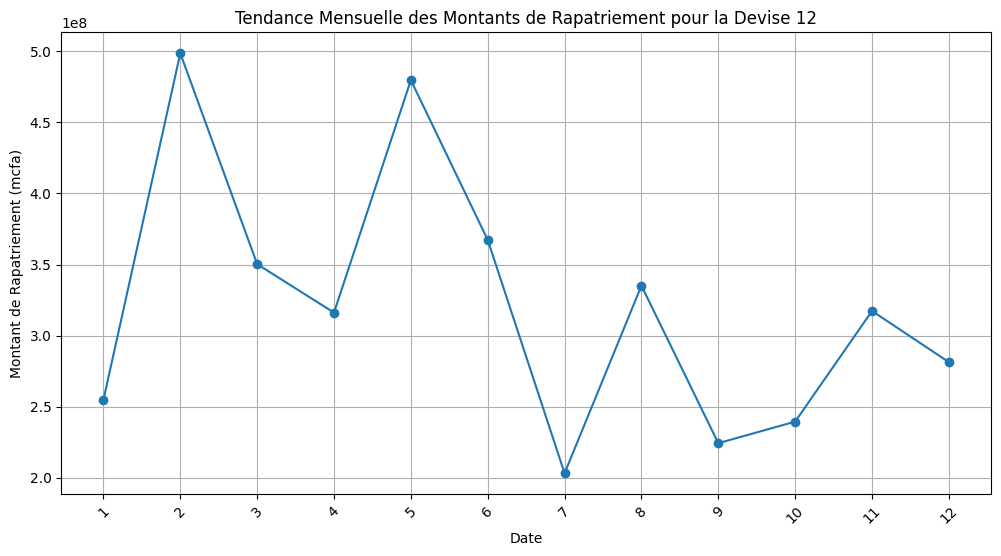

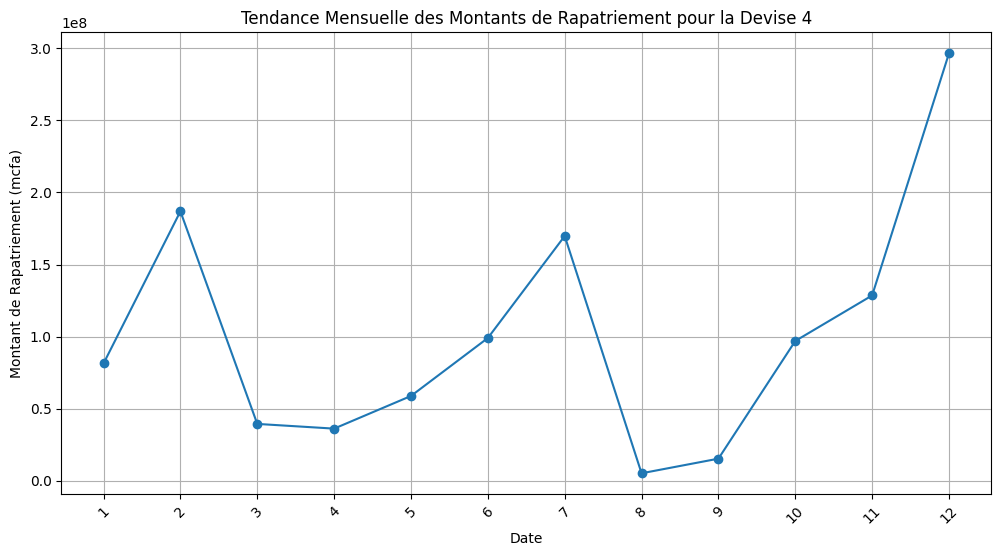

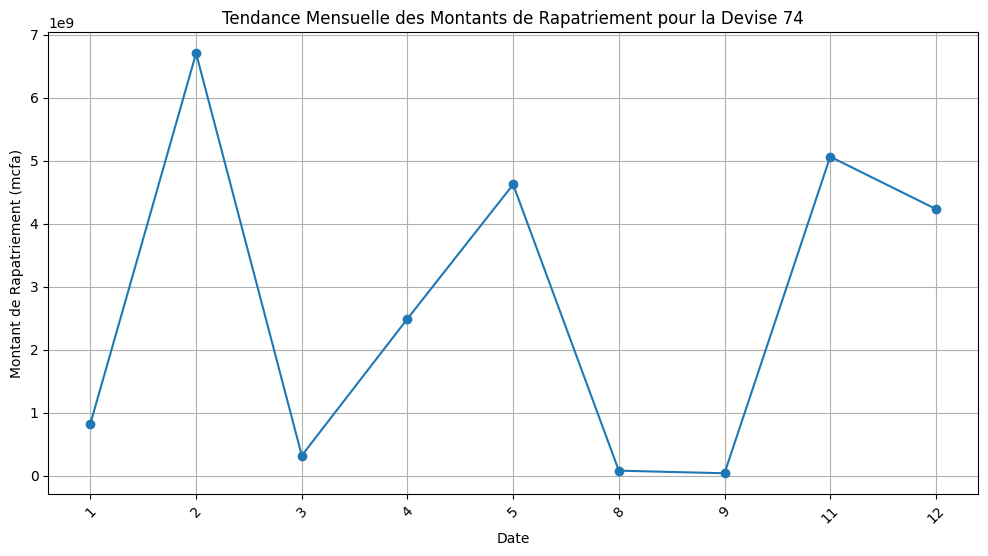

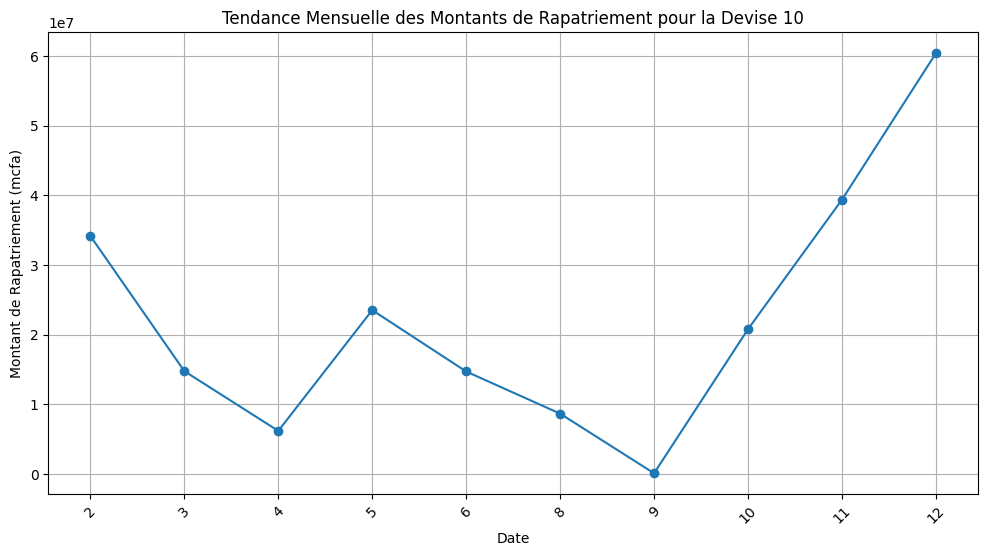

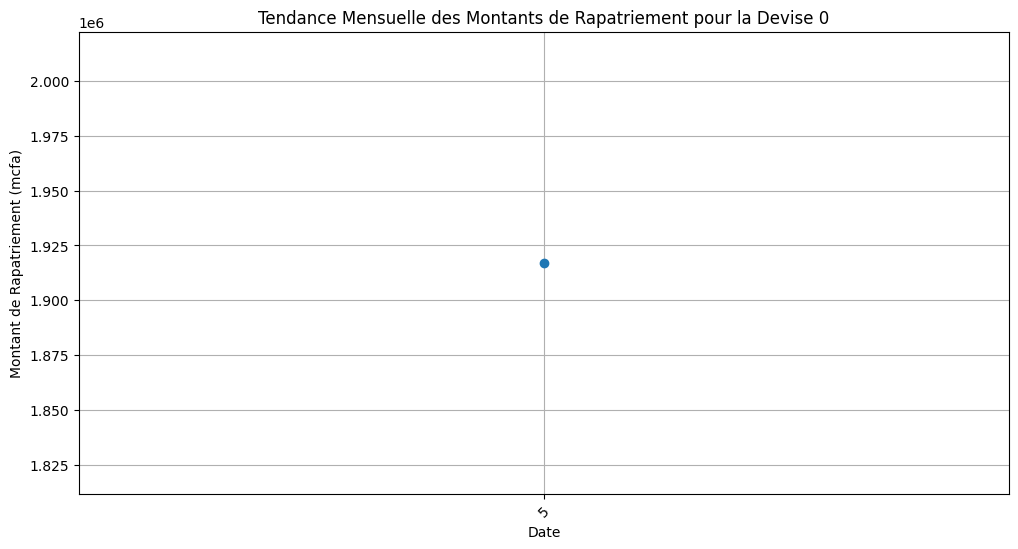

: 

In [22]:
# Obtenir la liste unique des devises
devises = rapatriement_data['dev'].unique()

# Initialiser un dictionnaire pour stocker les données mensuelles par devise
devises_trend = {}

# Regrouper les données par devise et par mois
for devise in devises:
    monthly_data = rapatriement_data[rapatriement_data['dev'] == devise].groupby('month')[' mcfa'].sum().reset_index()
    devises_trend[devise] = monthly_data

# Tracer un graphique distinct pour chaque devise montrant la série temporelle des montants de rapatriement
for devise, data in devises_trend.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['month'].astype(str), data[' mcfa'], marker='o', linestyle='-')
    plt.title(f'Tendance Mensuelle des Montants de Rapatriement pour la Devise {devise}')
    plt.xlabel('Date')
    plt.ylabel('Montant de Rapatriement (mcfa)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()